In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the Training and Test dataset.

In [60]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [61]:
df_test = pd.read_excel('Test_set.xlsx')
df_test

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

### Doing some preliminary Exploratory Data Analysis or EDA.

In [62]:
df_train.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

#### <i>Insight: There in 1 missing value in the 'Route' and 'Total_Stops' features.</i>

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [64]:
# To view the statistical description of 'all' features
df_train.describe(include = 'all')

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10683        10683    10683       10682           10683   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8345   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10683.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.064121  
std      4611.359167  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

In [65]:
# Viewwing the data type of the features in our dataset
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### <i>Insight: All features excpet 'Price' (which is of integer datatype) are categorical.</i>

In [66]:
# Hunting missing values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [67]:
# viewing how many 'total' null values are there in the dataset
df_train.isnull().sum().sum()

2

In [68]:
# Fetching those row(s) where there is/are missing values
df_train[df_train['Route'].isna() | df_train['Total_Stops'].isna()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

#### <i>Insight: The row at index 9039 contains a missing value in the Route and Total_Stops feature.</i><br><br>

#### <b>You will have to choose what must be done here with the missing values - Omit them OR Impute them?</b><br>
#### <i>Since, we only have one missing value, getting rid of them seems harmless and the right thing to do, not to mention it's just easier.</i>

In [69]:
df_train.dropna(inplace = True)

In [70]:
df_train.isnull().sum().sum()

0

In [71]:
df_train.describe()

Price
count  10682.000000
mean    9087.214567
std     4611.548810
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

## Price

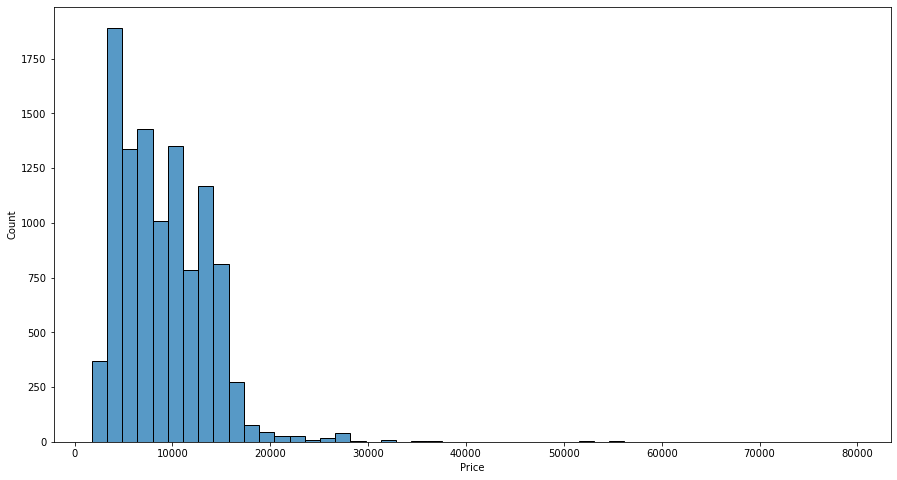

In [72]:
# Plotting a histogram to view how the 'Price' feature is laid out.

plt.figure(figsize = (15, 8))
sns.histplot(data = df_train, x = "Price", bins = 50)
plt.show()

## Date of Journey

In [73]:
df_train['Date_of_Journey'].dtype

dtype('O')

#### As you can see, the data type of Date_of_Journey is 'O' or Object. It means it is not considered as an integer.<br>
#### This arrangment is not suitable for the purpose of model building.<br>
#### A better intuition would be to separate the date, month, and the year. This is what is done in the following cells.

In [74]:
df_train['Date'] = df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month'] = df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year'] = df_train['Date_of_Journey'].str.split('/').str[2]

In [75]:
# Now convert them into int type
df_train['Date'] = df_train['Date'].astype(int)
df_train['Month'] = df_train['Month'].astype(int)
df_train['Year'] = df_train['Year'].astype(int)
df_train

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  Date  Month  Year  
0             No info   3897    24      3  2019  
1             No info   7662     1      5  2019  
2             No info  13882     9      6  2019  
3             No info   6218    12      5  2019  
4             No info  13302     1      3  2019  
...               ...    ...   ...    ...   ...  
10678         No info   4107     9      4  2019  
10679         No info   4145    27      4  2019  
10680         No info   7229    27      4  2019  
10681         No info  12648     1      3  2019  
10682         No info  11753     9      5  2019  

[10682 rows x 14 columns]

## Duration

In [76]:
df_train['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

#### As evident by the output above, the Duration is shown in a string format.<br>
#### So, they must be converted to an integer format so that they could be used for calculations

In [77]:
# converting duration into minutes
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1]) * 60

In [78]:
df_train["Duration"] = df_train["Duration"].apply(convert_duration)

In [79]:
df_train

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time  Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar       170    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15       445     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      1140     2 stops   
3            CCU → NAG → BLR    18:05         23:30       325      1 stop   
4            BLR → NAG → DEL    16:50         21:35       285      1 stop   
...                      ...      ...           ...       ...         ...   
10678              CCU → BLR    19:55         22:25       150    non-stop   
10679              CCU → BLR    20:45         23:20       155    non-stop   
10680              BLR → DEL    08:20         11:20       180    non-stop   
10681              BLR → DEL    11:30         14:10       160    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15       500     2 stops   

      Additional_Info  Price  Date  Month  Year  
0             No info   3897    24      3  2019  
1             No info   7662     1      5  2019  
2             No info  13882     9      6  2019  
3             No info   6218    12      5  2019  
4             No info  13302     1      3  2019  
...               ...    ...   ...    ...   ...  
10678         No info   4107     9      4  2019  
10679         No info   4145    27      4  2019  
10680         No info   7229    27      4  2019  
10681         No info  12648     1      3  2019  
10682         No info  11753     9      5  2019  

[10682 rows x 14 columns]

In [80]:
'''
In case you're wondering how a split function works, this is an illustration.
split() will split the string based on a delimiter.
By default, the space character is the delimiter if none is provided.'''

x = '2h 50m'
x.split()

['2h', '50m']

In [81]:
x.split()[1][:-1]

'50'

## Total_Stops<br>
#### The following cells show how the 'non-stop' output is replaced by 0 in the Total_Stops, and<br>the rest of the values would be filled in by the number of stops.

In [82]:
# formatting the stops
df_train["Stops"] = df_train["Total_Stops"].str.split(" ").str[0]
df_train["Stops"].replace("non-stop" , 0 , inplace = True)

In [84]:
# Converting the stops dtype to int
df_train['Stops'] = df_train["Stops"].astype(int)

In [85]:
df_train['Stops'].dtypes

dtype('int64')

In [86]:
df_train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time  Duration Total_Stops Additional_Info  Price  Date  \
0    22:20  01:10 22 Mar       170    non-stop         No info   3897    24   
1    05:50         13:15       445     2 stops         No info   7662     1   
2    09:25  04:25 10 Jun      1140     2 stops         No info  13882     9   
3    18:05         23:30       325      1 stop         No info   6218    12   
4    16:50         21:35       285      1 stop         No info  13302     1   

   Month  Year  Stops  
0      3  2019      0  
1      5  2019      2  
2      6  2019      2  
3      5  2019      1  
4      3  2019      1

In [88]:
# Viewing all the Categorical columns
cat = df_train.select_dtypes(include = 'object').columns.to_list()
cat

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Total_Stops',
 'Additional_Info']

In [89]:
# Viewing all the Integer columns
ints = df_train.select_dtypes(exclude = 'object').columns.to_list()
ints

['Duration', 'Price', 'Date', 'Month', 'Year', 'Stops']

# Data Visualization

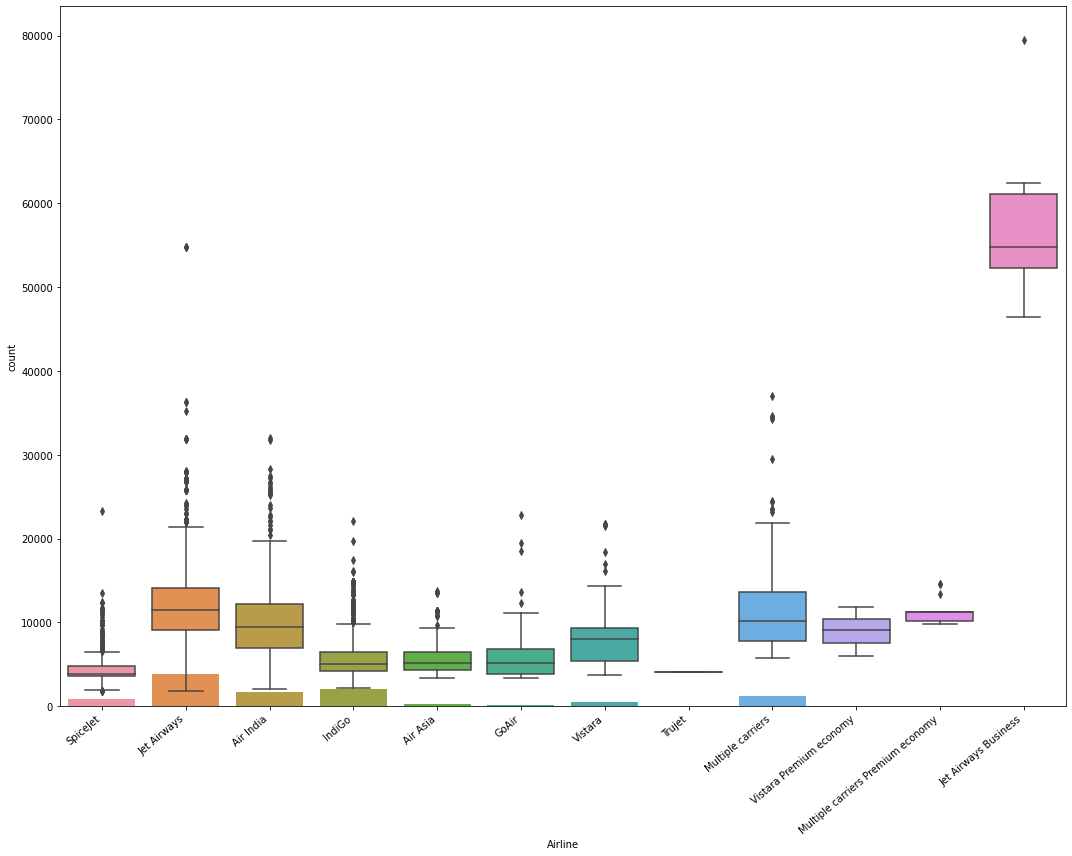

In [90]:
plt.figure(figsize = (15, 12))
sns.boxplot(x = 'Airline', y = 'Price', data = df_train.sort_values('Price', ascending = True))

ax = sns.countplot(x = "Airline", data = df_train.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Stops', ylabel='Price'>

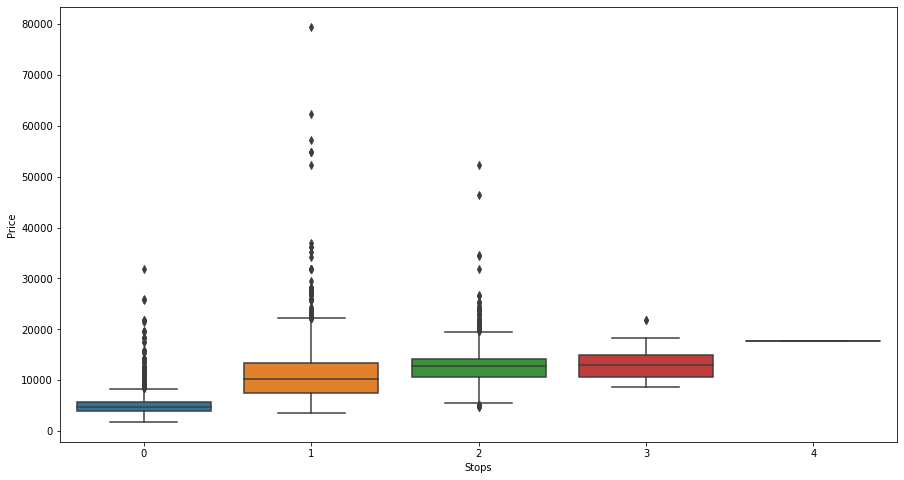

In [91]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Stops", y = "Price", data = df_train.sort_values("Price", ascending = False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

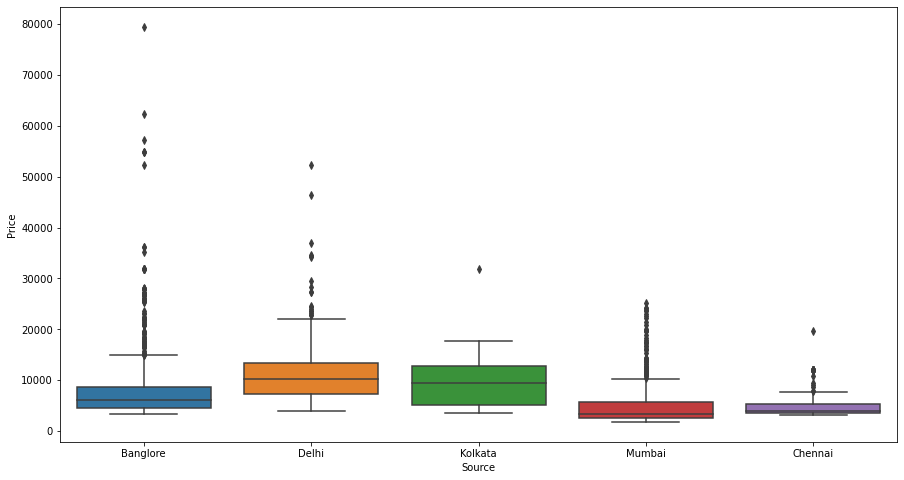

In [92]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Source", y = "Price", data = df_train.sort_values("Price", ascending = False))

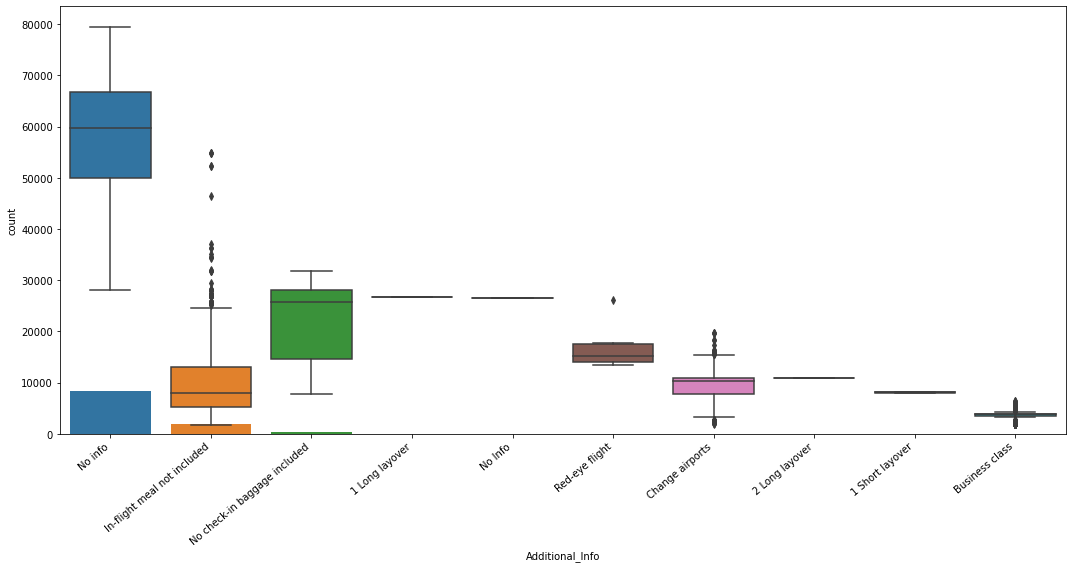

In [93]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Additional_Info", y = "Price", data = df_train.sort_values("Price", ascending = False))

ax = sns.countplot(x = "Additional_Info", data = df_train.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Duration', ylabel='Count'>

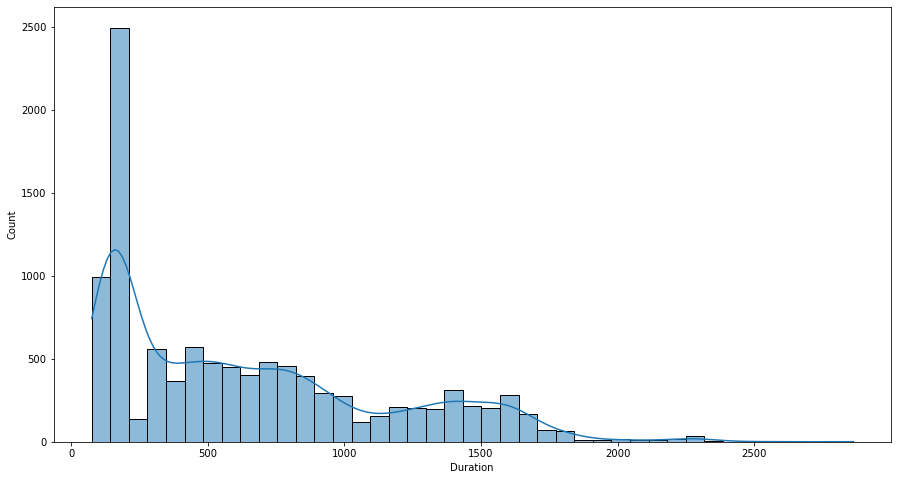

In [94]:
plt.figure(figsize = (15 , 8))
sns.histplot(data = df_train , x = "Duration" , kde = True)

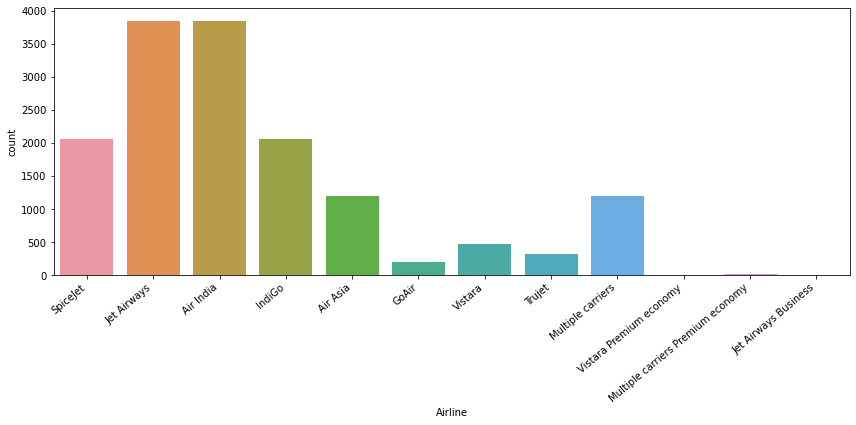

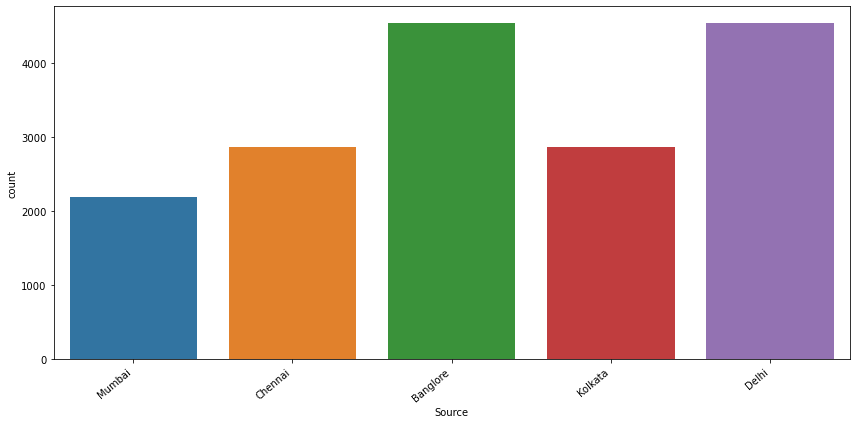

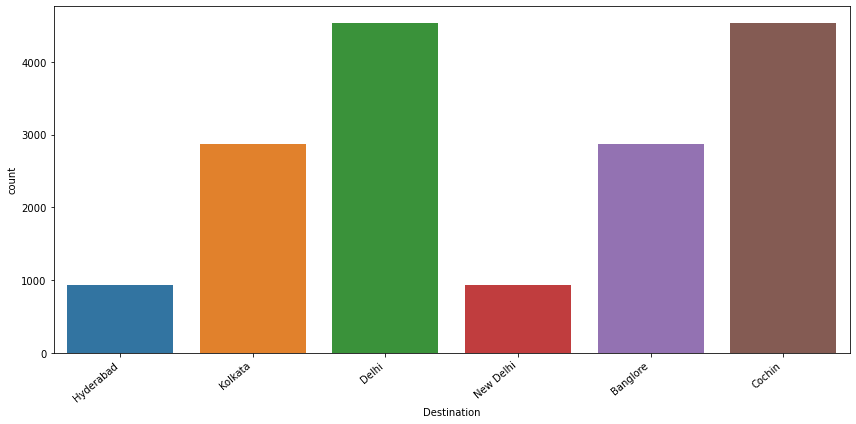

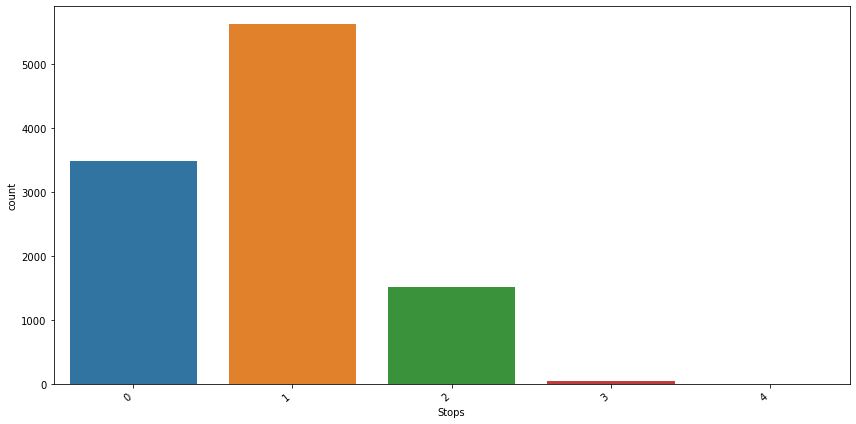

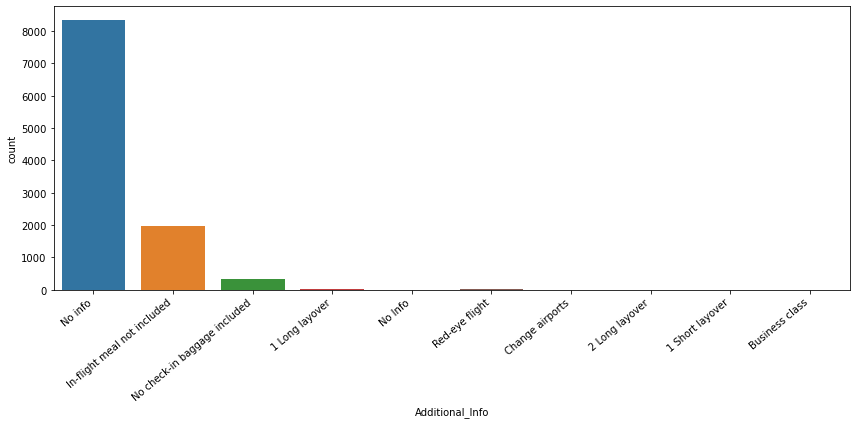

In [95]:
for i in ["Airline" , "Source" , "Destination" , "Stops" , "Additional_Info"]:
    plt.figure(figsize = (12 , 6))
    sns.countplot(data = df_train , x = i)
    
    ax = sns.countplot(x = i, data = df_train.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("\n\n")

<AxesSubplot:>

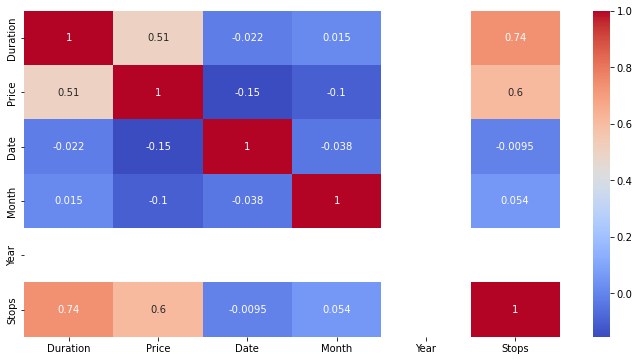

In [96]:
plt.figure(figsize = (12 , 6))
sns.heatmap(df_train.corr() , annot = True , cmap = "coolwarm")